In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# readinig the clean data
df_location = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Web_Scraping/main/payscale/using_json/data/clean/clean_data_location.csv')
df_employer = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Web_Scraping/main/payscale/using_json/data/clean/clean_data_employer.csv')
df_skills = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Web_Scraping/main/payscale/using_json/data/clean/clean_data_skills.csv')
df_experience = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Web_Scraping/main/payscale/using_json/data/clean/clean_data_experience.csv')
df_summary = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Web_Scraping/main/payscale/using_json/data/clean/clean_data_summary.csv')

---
 # Location

---

In [24]:
df_location

,state,city,job_title,median_salary,profile_count
0,New York,New York,ABAP_Developer,73758.95,10
1,Georgia,Atlanta,ABAP_Developer,80000.00,8
2,Minnesota,Minneapolis,ABAP_Developer,104963.73,5
3,District of Columbia,Washington,ABAP_Developer,67250.00,5
4,Texas,Dallas,ABAP_Developer,105500.00,4
...,...,...,...,...,...
32658,Georgia,Atlanta,Wireless_Communications_Engineer,82424.24,7
32659,California,Santa Clara,Wireless_Communications_Engineer,120000.00,5
32660,California,San Diego,Wireless_Communications_Engineer,97000.00,5
32661,New York,New York,Wireless_Communications_Engineer,85000.00,5


In [3]:
df_location['job_title'].value_counts()

Senior_Software_Engineer                                            976
Information_Technology_(IT)_Manager                                 860
Information_Technology_(IT)_Director                                673
Web_Developer                                                       495
Business_Analyst%2C_IT                                              461
                                                                   ... 
Data_Warehouse_Administrator                                          1
Customer_Relationship_Management_(CRM)_Application_Administrator      1
Configuration_Manager%2C_Software_%2F_Computer_Hardware               1
Computer_Operations_Supervisor                                        1
Integration%2FTest_Manager%2C_Data_Processing_Systems                 1
Name: job_title, Length: 526, dtype: int64

In [4]:
df_location['state'] = df_location['state'].apply(lambda x: x.strip())

In [5]:
df_location['state'][1]

'Georgia'

In [6]:
df_location['city'].value_counts()

New York        429
Chicago         396
Seattle         361
Dallas          358
Atlanta         357
               ... 
Newkirk           1
Piqua             1
Dickinson         1
Russellville      1
Suitland          1
Name: city, Length: 1784, dtype: int64

In [7]:
def translate_geometries(df, x, y, scale, rotate):
    df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
    center = df.dissolve().centroid.iloc[0]
    df.loc[:, "geometry"] = df.geometry.scale(xfact=scale, yfact=scale, origin=center)
    df.loc[:, "geometry"] = df.geometry.rotate(rotate, origin=center)
    return df

def adjust_maps(df):
    df_main_land = df[~df.STATEFP.isin(["02", "15"])]
    df_alaska = df[df.STATEFP == "02"]
    df_hawaii = df[df.STATEFP == "15"]
    
    df_alaska = translate_geometries(df_alaska, 1300000, -4900000, 0.5, 32)
    df_hawaii = translate_geometries(df_hawaii, 5400000, -1500000, 1, 24)
    
    return pd.concat([df_main_land, df_alaska, df_hawaii])

# Load and prepare geo-data
states = gpd.read_file("cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]
states = states.to_crs("ESRI:102003")
states = adjust_maps(states)

edge_color = "#30011E"
background_color = "#fafafa"

sns.set_style({
    "font.family": "serif",
    "figure.facecolor": background_color,
    "axes.facecolor": background_color,
})

C:\Users\Peti\AppData\Local\Temp\ipykernel_6616\704085656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
C:\Users\Peti\AppData\Local\Temp\ipykernel_6616\704085656.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
C:\Users\Peti\AppData\Local\Temp\ipykernel_6616\704085656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

<Axes: >

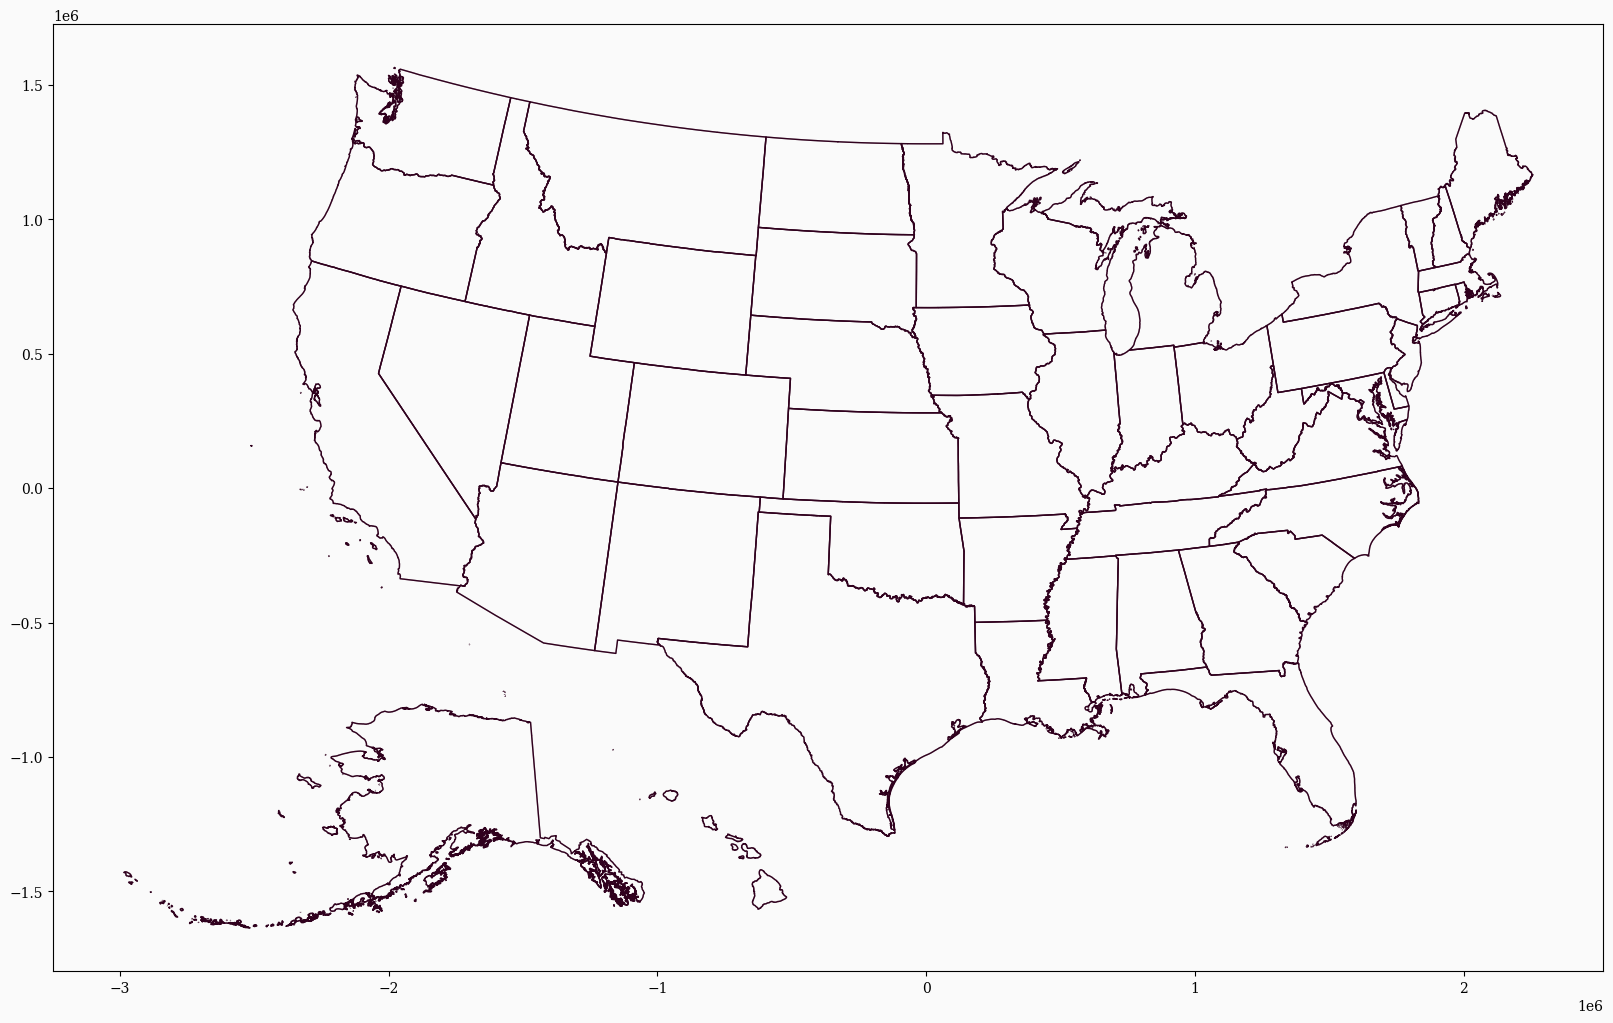

In [8]:
ax = states.plot(edgecolor=edge_color + "55", color="None", figsize=(20, 20))
states.plot(ax=ax, edgecolor=edge_color, color="None", linewidth=1)


In [9]:
# Merge states GeoDataFrame with df_location based on the state names
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((719952.837 -785108.098, 721081..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((1799007.580 17387.012, 1799662..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-620696.279 -86190.761, -620035.123 ..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((1753262.513 222134.664, 175330..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((1155315.949 156313.791, 1155325.846 ..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((687937.424 -826945.846, 688125..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((1049980.893 578947.108, 105010..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((2115202.912 712698.936, 211613..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-1673716.600 959582.456, -1673032.13..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((1599929.568 -1197648.525, 1600..."


In [16]:
def state_df(df,job_title):
    df_state = df.query('job_title == @job_title')
    df_state = df_state.groupby('state').aggregate({'median_salary':'mean'}).reset_index()
    merged_df = states.merge(df_state,right_on='state',left_on='NAME')
    return merged_df

job_titles = df_location['job_title'].unique().tolist()
    

In [11]:
job_titles

['ABAP_Developer',
 'ASIC_Design_Engineer',
 'ASIC_Engineer',
 'ASP.NET_Developer',
 nan,
 'Actuarial_Associate',
 'Actuarial_Consultant',
 'Actuary',
 'Alliance_Manager%2C_Enterprise_Software',
 'Analyst_Methods_%26_Procedures',
 'Analytical_Strategist',
 'Analytics_Manager',
 'Android_Software_Developer',
 'Android_Software_Engineer',
 'Application_Architect',
 'Application_Developer',
 'Application_Integration_Engineer',
 'Application_Support_Analyst',
 'Applications_Analyst%2C_Software',
 'Applications_Development_Director%2C_IT_%2F_Information_Systems',
 'Applications_Development_Manager',
 'Applications_Development_Manager%2C_Computer_Software',
 'Applications_Engineer',
 'Applications_Engineer%2C_Electrical',
 'Applications_Engineering_Manager',
 'Applications_Programmer',
 'Applications_Support_Lead',
 'Applications_Systems_Analyst',
 'Applications_Systems_Analyst%2FProgrammer',
 'Applications_Systems_and_Program_Manager',
 'Applications_and_Support_Engineer',
 'Architect_(Comp

In [20]:
merged_df = state_df(df_location,'Data_Scientist')
merged_df

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,median_salary
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((1799007.580 17387.012, 1799662...",North Carolina,96153.592000
1,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-620696.279 -86190.761, -620035.123 ...",Oklahoma,85346.980000
2,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((1753262.513 222134.664, 175330...",Virginia,94811.093000
3,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((687937.424 -826945.846, 688125...",Louisiana,77435.943333
4,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((1049980.893 578947.108, 105010...",Michigan,88518.354000
5,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((2115202.912 712698.936, 211613...",Massachusetts,95169.625833
6,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-1673716.600 959582.456, -1673032.13...",Idaho,98240.265000
7,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((1599929.568 -1197648.525, 1600...",Florida,86094.888462
8,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-669588.858 439687.751, -669336.395 ...",Nebraska,79524.675000
9,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-1956992.586 1506001.131, -195...",Washington,110029.091250


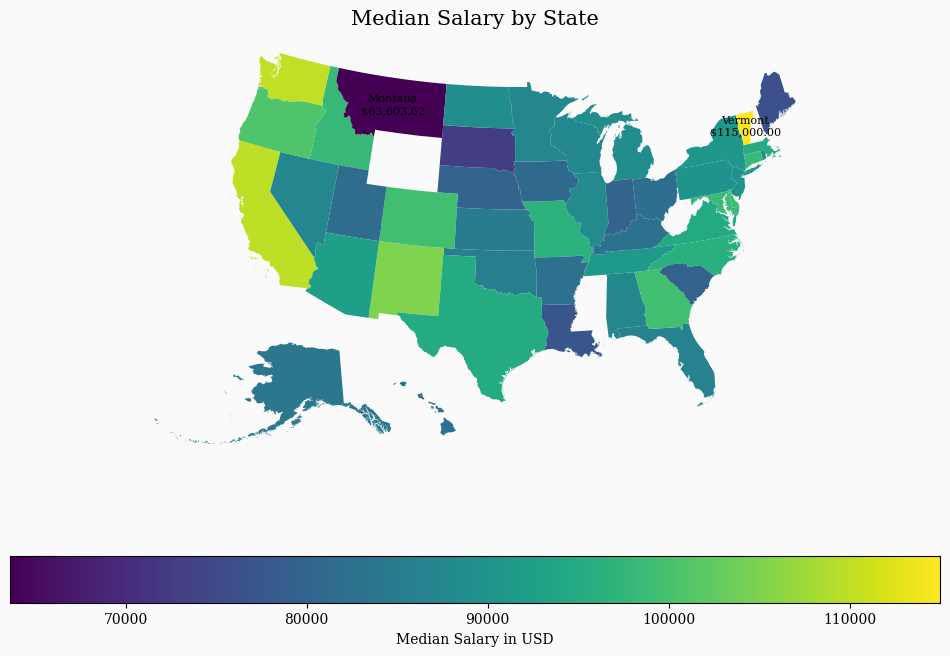

In [23]:
# Plot the map with continuous coloring based on median_salary
fig, ax = plt.subplots(figsize=(12, 8))
merged_df.plot(column='median_salary',ax=ax,legend=True,legend_kwds={'label': "Median Salary in USD",'orientation': "horizontal"},
               vmin=merged_df['median_salary'].min(), vmax=merged_df['median_salary'].max())

# Add title and adjust styling
ax.set_title('Median Salary by State', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()
sns.despine(left=True, bottom=True)

# Find the state with the highest median_salary
highest_salary_state = merged_df.loc[merged_df['median_salary'].idxmax()]

# Find the state with the lowest median_salary
lowest_salary_state = merged_df.loc[merged_df['median_salary'].idxmin()]

# Add state names and median_salary values as annotations for the highest and lowest salary states
for state in [highest_salary_state, lowest_salary_state]:
    x, y = state.geometry.centroid.x, state.geometry.centroid.y
    label, salary = state['state'], state['median_salary']
    ax.text(x, y, f'{label}\n${salary:,.2f}', fontsize=8, ha='center', va='center')
plt.show()